# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aroma
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | enewetak
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | utrik
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | portland
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | orsha
Processing Record 12 of Set 1 | lihue
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | usinsk
Processing Record 15 of Set 1 | iskateley
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | bel ombre
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | alaghsas
Processing Record 21 of Set 1 | garoowe
Processing Record 22 of Set 1 | sinabang
Processing Record 23 of Set 1 | blackma

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aroma,15.8167,36.1333,34.98,14,0,5.32,SD,1713988583
1,tiksi,71.6872,128.8694,-12.27,89,100,5.78,RU,1713988583
2,port-aux-francais,-49.3500,70.2167,4.24,64,49,9.43,TF,1713988584
3,ushuaia,-54.8000,-68.3000,11.79,54,40,3.60,AR,1713988584
4,enewetak,11.3474,162.3373,27.62,80,89,8.24,MH,1713988584


In [22]:
#Convert Date

import datetime

# Unix timestamp
timestamp = 1713900853

# Convert Unix timestamp to datetime object
date_time = datetime.datetime.fromtimestamp(timestamp)

# Print the date and time in a human-readable format
print("Converted Date and Time:", date_time)

Converted Date and Time: 2024-04-23 15:34:13


In [23]:
#Convert Date 2

import datetime

# Unix timestamp
timestamp_dos = 1713901122

# Convert Unix timestamp to datetime object
date_time = datetime.datetime.fromtimestamp(timestamp_dos)

# Print the date and time in a human-readable format
print("Converted Date and Time:", date_time)

Converted Date and Time: 2024-04-23 15:38:42


In [24]:
import os

# Define the directory path
directory = "output_data"

# Check if the directory exists
if not os.path.exists(directory):
    # If it doesn't exist, create it
    os.makedirs(directory)
    print(f"Directory '{directory}' created successfully.")
else:
    print(f"Directory '{directory}' already exists.")

Directory 'output_data' already exists.


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aroma,15.8167,36.1333,34.98,14,0,5.32,SD,1713988583
1,tiksi,71.6872,128.8694,-12.27,89,100,5.78,RU,1713988583
2,port-aux-francais,-49.3500,70.2167,4.24,64,49,9.43,TF,1713988584
3,ushuaia,-54.8000,-68.3000,11.79,54,40,3.60,AR,1713988584
4,enewetak,11.3474,162.3373,27.62,80,89,8.24,MH,1713988584


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

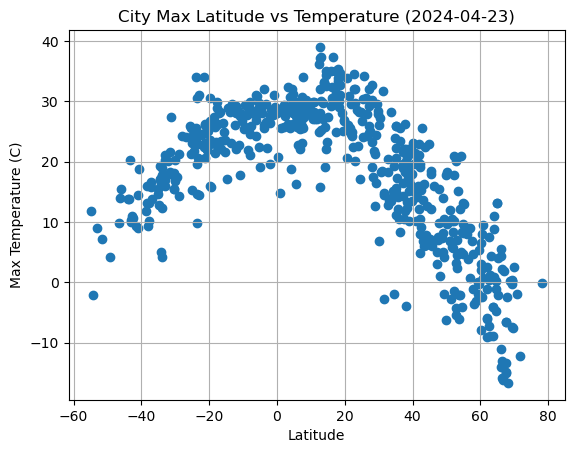

In [27]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, marker = 'o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperature (2024-04-23)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

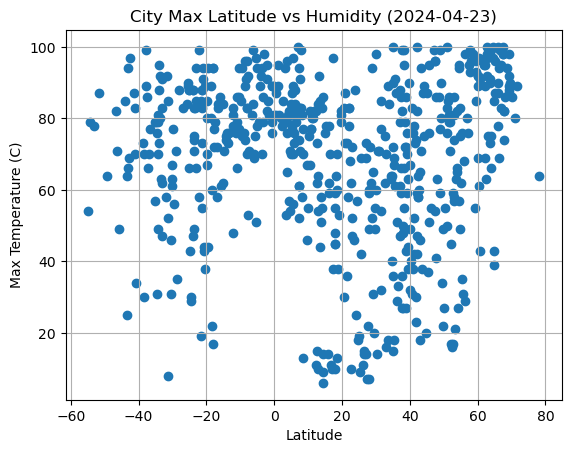

In [28]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, marker = 'o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Humidity (2024-04-23)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

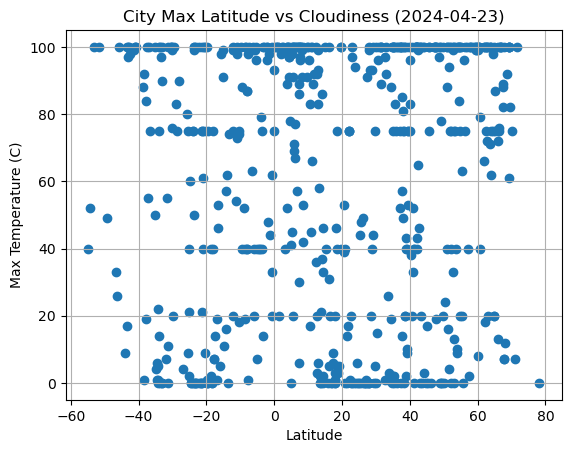

In [29]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, marker = 'o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Cloudiness (2024-04-23)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

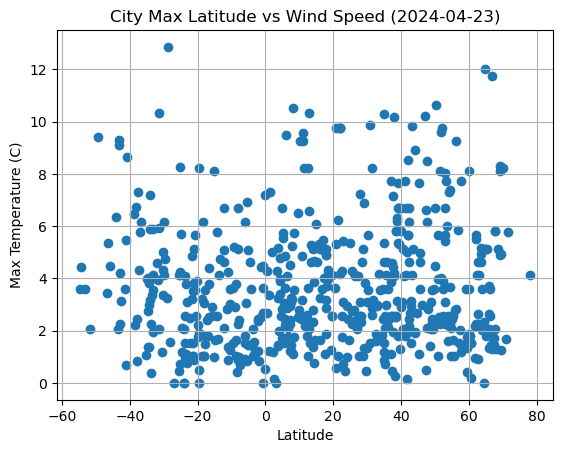

In [30]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, marker = 'o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Wind Speed (2024-04-23)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# # Define a function to create Linear Regression plots
#slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
# x_values = data_df["X"] 
# y_values = data_df["Y"]

# #Create Regression Line
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# #Plot Data
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")

# #Add Labels 
# plt.xlabel('x label')
# plt.ylabel('y label')
# plt.title('title')
# plt.r_text = f'r = {r_value:.2f}'
# plt.annotate(line_eq,(),fontsize=15,color="red", xytext=(), ha='left/right', va='top/center/bottom' )




In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aroma,15.8167,36.1333,34.98,14,0,5.32,SD,1713988583
1,tiksi,71.6872,128.8694,-12.27,89,100,5.78,RU,1713988583
4,enewetak,11.3474,162.3373,27.62,80,89,8.24,MH,1713988584
5,bethel,41.3712,-73.4140,20.22,42,40,4.12,US,1713988552
6,utrik,11.2278,169.8474,27.05,81,66,9.58,MH,1713988584


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,4.24,64,49,9.43,TF,1713988584
3,ushuaia,-54.8000,-68.3000,11.79,54,40,3.60,AR,1713988584
15,adamstown,-25.0660,-130.1015,23.17,88,21,8.28,PN,1713988587
16,edinburgh of the seven seas,-37.0676,-12.3116,15.82,70,100,5.77,SH,1713988587
17,bel ombre,-4.6167,55.4167,28.91,79,40,4.63,SC,1713988588


###  Temperature vs. Latitude Linear Regression Plot

r = -0.85


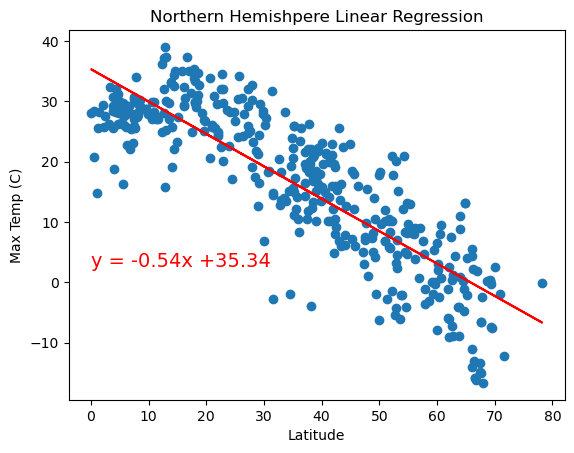

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"] 
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, r_value, p_value, std_err ) = linregress(x_values, y_values)


#Create Regression Line
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Add Labels 
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('Northern Hemishpere Linear Regression')
plt.annotate(line_eq,(10,-10),fontsize=14,color="red",xytext=(0,5), ha='left', va='top' )
print(f'r = {r_value:.2f}')


plt.show()


r = 0.79


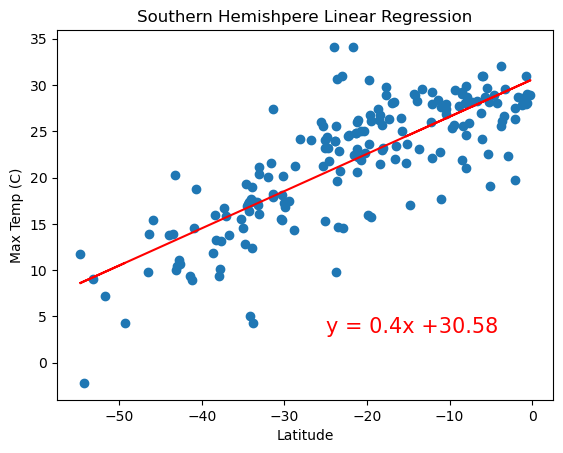

In [43]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"] 
y_values = southern_hemi_df["Max Temp"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

#Create Regression Line
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Add Labels 
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('Southern Hemishpere Linear Regression')
plt.annotate(line_eq,(-30,8),fontsize=15,color="red", xytext=(-25,5), ha='left', va='top' )
print(f'r = {r_value:.2f}')


plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere has a positive slope (positive correlation) and Southern has a negative slope (negative correlation). Despite this the scattering of the data loosely has a similar pattern. The northern hemisphere also seems to have a slightly stronger relationship (the absolute value of North -0.55 is greater than that of South 0.37).

### Humidity vs. Latitude Linear Regression Plot

r = 0.17


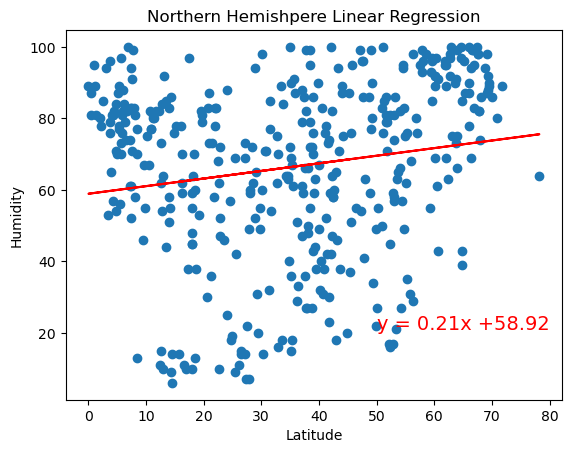

In [44]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"] 
y_values = northern_hemi_df["Humidity"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

#Create Regression Line
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Add Labels 
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemishpere Linear Regression')
plt.annotate(line_eq,(10,15),fontsize=14,color="red",xytext=(50,25), ha='left', va='top' )

print(f'r = {r_value:.2f}')


plt.show()

r = 0.24


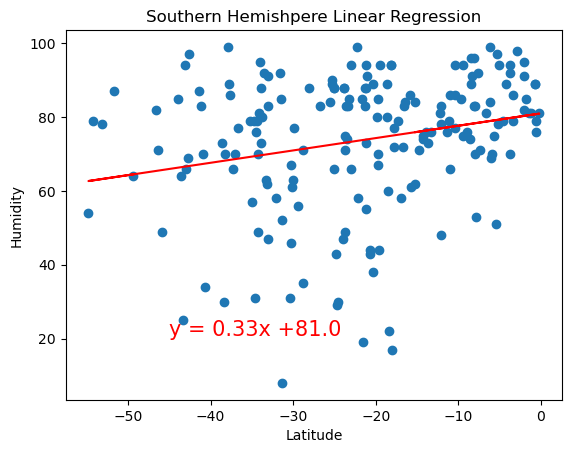

In [45]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"] 
y_values = southern_hemi_df["Humidity"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

#Create Regression Line
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Add Labels 
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemishpere Linear Regression')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red", xytext=(-45,25), ha='left', va='top' )

print(f'r = {r_value:.2f}')

plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere has a positive slope (positive correlation) and Southern, also, has a positive slope (positive correlation). Both seem to have a higher density of scattering toward the top o the graph. However, the southern is more sparsely scattered below the slope line. The southern hemisphere also seems to have a slightly stronger relationship (the absolute value of North 0.25 is slightly less than that of South 0.44).

### Cloudiness vs. Latitude Linear Regression Plot

r = 0.08


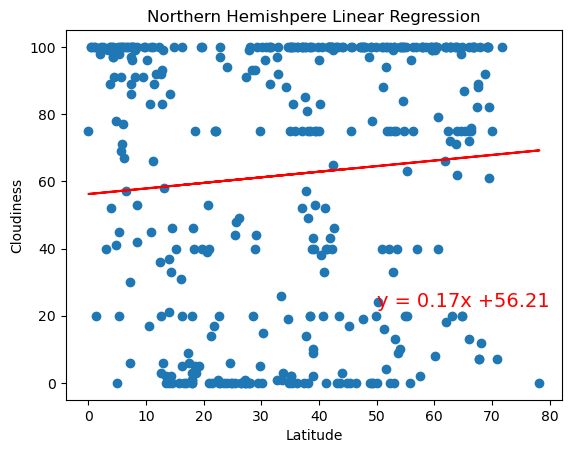

In [46]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"] 
y_values = northern_hemi_df["Cloudiness"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

#Create Regression Line
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Add Labels 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemishpere Linear Regression')
plt.annotate(line_eq,(25,15),fontsize=14,color="red",xytext=(50,27), ha='left', va='top' )

print(f'r = {r_value:.2f}')

plt.show()

r = 0.01


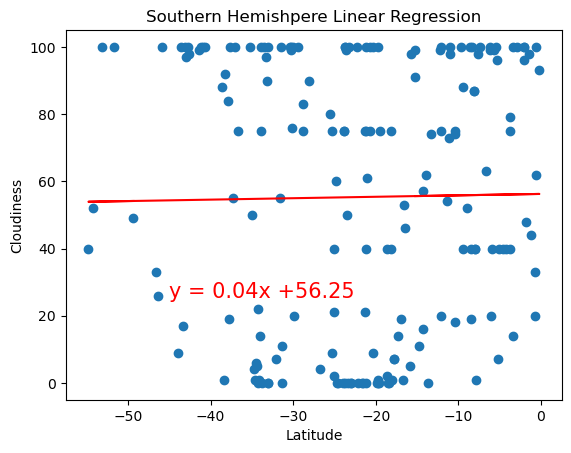

In [48]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"] 
y_values = southern_hemi_df["Cloudiness"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

#Create Regression Line
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Add Labels 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemishpere Linear Regression')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red", xytext=(-45,30), ha='left', va='top' )

print(f'r = {r_value:.2f}')

plt.show()

#### **Discussion about the linear relationship:** 
Northern Hemisphere has a positive slope (positive correlation) and Southern, also, has a positive slope (positive correlation). Both seem to scatter in a way that many cities return simliar patterns of cloudiness. The similarities exist at different latitudes, which visualizes as (loosely) lines in the graph. Both North and South also share a similar strength in relationship (the absolute value of North 0.35 & South 0.25).

### Wind Speed vs. Latitude Linear Regression Plot

r = 0.03


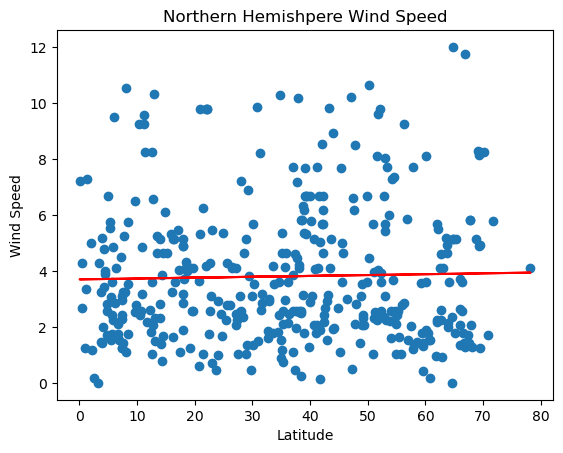

In [51]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"] 
y_values = northern_hemi_df["Wind Speed"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

#Create Regression Line
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Add Labels 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemishpere Wind Speed')
plt.annotate(line_eq,(25,15),fontsize=14,color="red",xytext=(10,10), ha='left', va='top' )

print(f'r = {r_value:.2f}')

plt.show()

r = -0.30


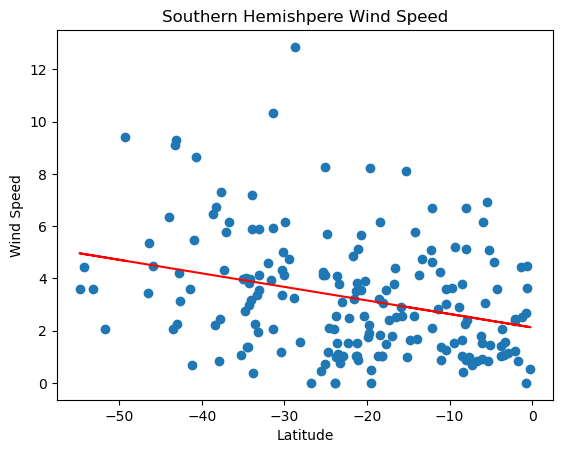

In [55]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"] 
y_values = southern_hemi_df["Wind Speed"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

#Create Regression Line
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Data
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Add Labels 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemishpere Wind Speed')
plt.annotate(line_eq,(10,0),fontsize=15,color="red", xytext=(-30,14), ha='left', va='top' )

print(f'r = {r_value:.2f}')

plt.show()

**Discussion about the linear relationship:** 
Both North and South have a negative slope (negative correlation). However, the North is not as steep of a negative slope as the South. Both seem to scatter in a way that aggregates at a higher density toward the bottom of the graph. Both North and South also share a similar strength in relationship.